In [150]:
from bs4 import BeautifulSoup
import pandas as pd
import json
import requests


#_content = 'NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP'
_key = 'fc559bdc92bdaf05efe6898422e3325104eec517'
_area = 'state' # 'us'
_url = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for={_area}:*&key={_key}'

_columns = ['GEO_ID','NAME','NAICS2017','NAICS2017_LABEL','SEX','SEX_LABEL','ETH_GROUP','ETH_GROUP_LABEL','RACE_GROUP','RACE_GROUP_LABEL','VET_GROUP','VET_GROUP_LABEL','EMPSZFI','EMPSZFI_LABEL','YEAR','FIRMPDEMP','FIRMPDEMP_F','RCPPDEMP','RCPPDEMP_F','EMP','EMP_F','PAYANN','PAYANN_F','FIRMPDEMP_S','FIRMPDEMP_S_F','RCPPDEMP_S','RCPPDEMP_S_F','EMP_S','EMP_S_F','PAYANN_S','PAYANN_S_F']

r = requests.get(_url).json()

filename = 'census_data_2018.json'
with open(filename,'wt') as census:
    json.dump(r, census)

In [455]:
# Creates dataframe from json file
census_df = pd.read_json(filename)

# Renames the headers
census_df.rename(columns=census_df.iloc[0],inplace=True)
census_df.drop(0,inplace=True)

print(census_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261397 entries, 1 to 261397
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GEO_ID            261397 non-null  object
 1   NAME              261397 non-null  object
 2   NAICS2017         261397 non-null  object
 3   NAICS2017_LABEL   261397 non-null  object
 4   SEX               261397 non-null  object
 5   SEX_LABEL         261397 non-null  object
 6   ETH_GROUP         261397 non-null  object
 7   ETH_GROUP_LABEL   261397 non-null  object
 8   RACE_GROUP        261397 non-null  object
 9   RACE_GROUP_LABEL  261397 non-null  object
 10  VET_GROUP         261397 non-null  object
 11  VET_GROUP_LABEL   261397 non-null  object
 12  EMPSZFI           261397 non-null  object
 13  EMPSZFI_LABEL     261397 non-null  object
 14  YEAR              261397 non-null  object
 15  FIRMPDEMP         261397 non-null  object
 16  FIRMPDEMP_F       171599 non-null  obj

In [458]:
# Ted
# geolocation -> race
# geolocation -> vet_group

# Name, rcppdemp, race_group, vet_group
tk_cut = census_df[["NAME","RACE_GROUP_LABEL","VET_GROUP_LABEL"]]

In [525]:
tk_races_specific = tk_cut[(tk_cut['RACE_GROUP_LABEL'] != 'Classifiable') & (tk_cut['RACE_GROUP_LABEL'] != 'Unclassifiable') & (tk_cut['RACE_GROUP_LABEL'] != 'Nonminority') & (tk_cut['RACE_GROUP_LABEL'] != 'Minority') & (tk_cut['RACE_GROUP_LABEL'] != 'Equally minority/nonminority') & (tk_cut['RACE_GROUP_LABEL'] != 'Total')]
tk_races_geo = tk_races_specific.drop("VET_GROUP_LABEL",axis=1)
tk_geo_racesgrouped = tk_races_geo.groupby('NAME', sort=False)['RACE_GROUP_LABEL'].value_counts()
print(tk_geo_racesgrouped)

NAME         RACE_GROUP_LABEL                          
Mississippi  White                                         739
             Black or African American                     356
             Asian                                         290
             American Indian and Alaska Native             148
             Native Hawaiian and Other Pacific Islander     41
                                                          ... 
Minnesota    White                                         809
             Asian                                         387
             Black or African American                     344
             American Indian and Alaska Native             246
             Native Hawaiian and Other Pacific Islander    100
Name: RACE_GROUP_LABEL, Length: 253, dtype: int64


x_plot = tk_geo_racesgrouped[state].plot(kind='barh', title='{state} Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(8, 6))

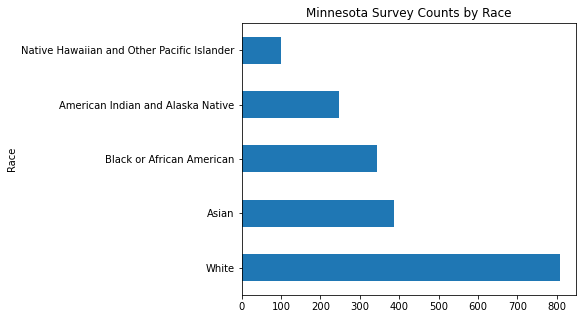

In [517]:
# Minnesota
mn_plot = tk_geo_racesgrouped["Minnesota"].plot(kind='barh', title='Minnesota Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

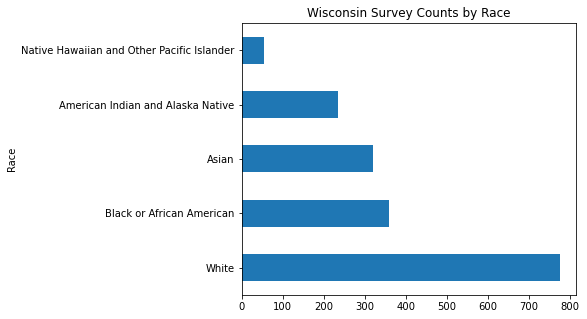

In [463]:
#Wisconsin
wi_plot = tk_geo_racesgrouped["Wisconsin"].plot(kind='barh', title='Wisconsin Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

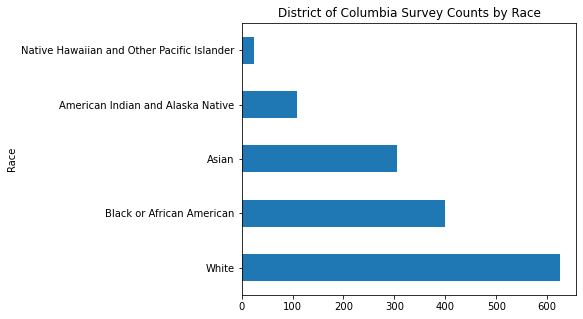

In [516]:
#Washington D.C.
dc_plot = tk_geo_racesgrouped["District of Columbia"].plot(kind='barh', title='District of Columbia Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

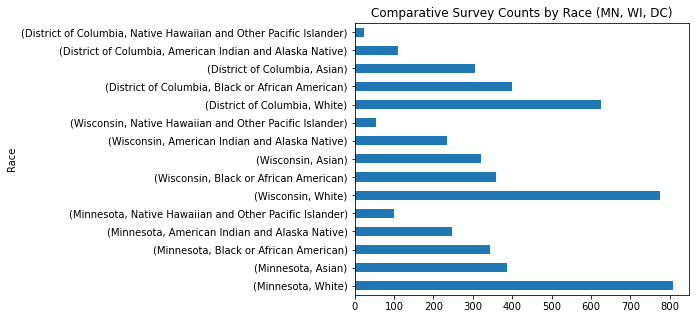

In [514]:
comp_plot = tk_geo_racesgrouped[["Minnesota", "Wisconsin", "District of Columbia"]].plot(kind='barh', title='Comparative Survey Counts by Race (MN, WI, DC)', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

In [512]:
tk_vet_specific = tk_cut[(tk_cut['VET_GROUP_LABEL'] != 'Classifiable') & (tk_cut['VET_GROUP_LABEL'] != 'Unclassifiable')]
tk_vet_geo = tk_vet_specific.drop("RACE_GROUP_LABEL", axis=1)
tk_geo_vetgrouped = tk_vet_geo.groupby("NAME", sort=True)["VET_GROUP_LABEL"].value_counts(sort=True)
print(tk_geo_vetgrouped)

NAME       VET_GROUP_LABEL           
Alabama    Total                         2910
           Nonveteran                     940
           Veteran                        496
           Equally veteran/nonveteran     352
Alaska     Total                         2530
                                         ... 
Wisconsin  Equally veteran/nonveteran     362
Wyoming    Total                         2245
           Nonveteran                     794
           Veteran                        377
           Equally veteran/nonveteran     282
Name: VET_GROUP_LABEL, Length: 204, dtype: int64


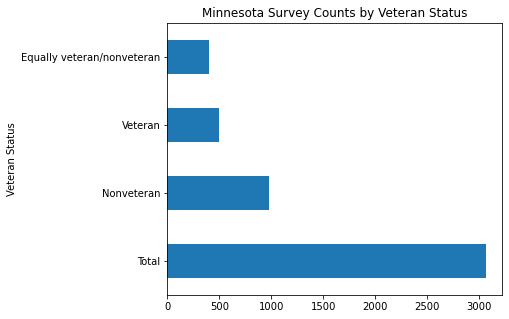

In [518]:
mn_plot = tk_geo_vetgrouped["Minnesota"].plot(kind='barh', title='Minnesota Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

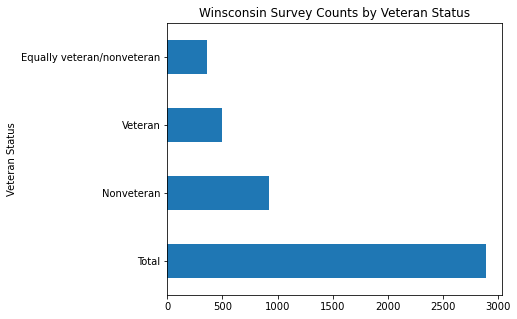

In [526]:
wi_plot = tk_geo_vetgrouped["Wisconsin"].plot(kind='barh', title='Winsconsin Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

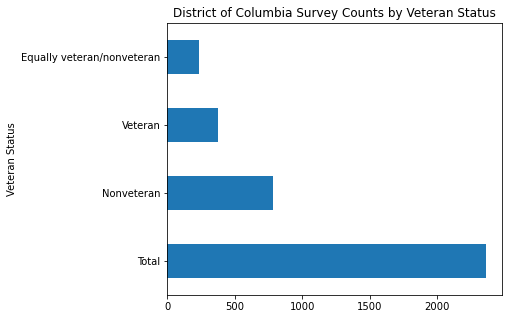

In [527]:
dc_plot = tk_geo_vetgrouped["District of Columbia"].plot(kind='barh', title='District of Columbia Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

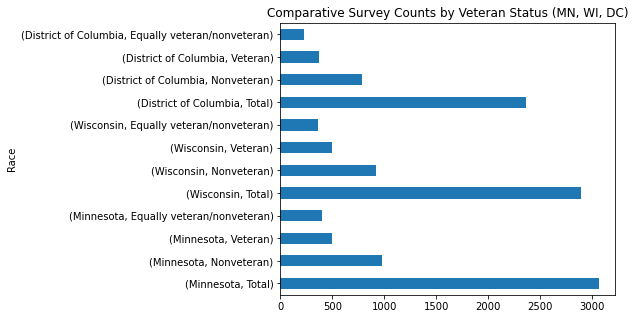

In [522]:
comp_plot = tk_geo_vetgrouped[["Minnesota", "Wisconsin", "District of Columbia"]].plot(kind='barh', title='Comparative Survey Counts by Veteran Status (MN, WI, DC)', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))